In [1]:
# IMporting the Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn import model_selection as ms
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')
import   matplotlib.style
plt.style.use('classic')

In [2]:
# importing the glass dataset
col=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
data=pd.read_csv('glass.csv',names=col)
data.shape


(214, 10)

In [3]:
# first 10 records in the dataset
data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [4]:
#Summary Statistics of the glass dataset
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [5]:
# checking null values
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


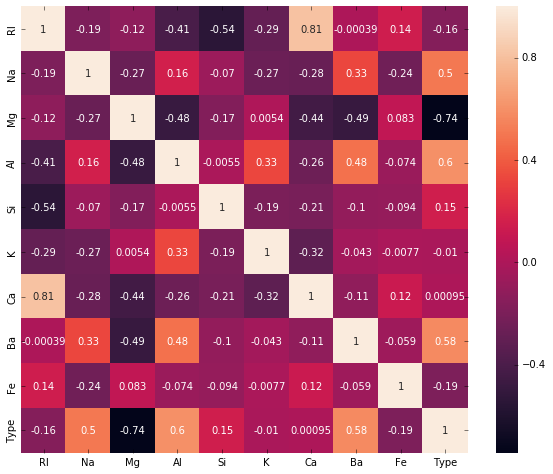

In [7]:
# correlation matrix
plt.figure(figsize=[10,8])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [8]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

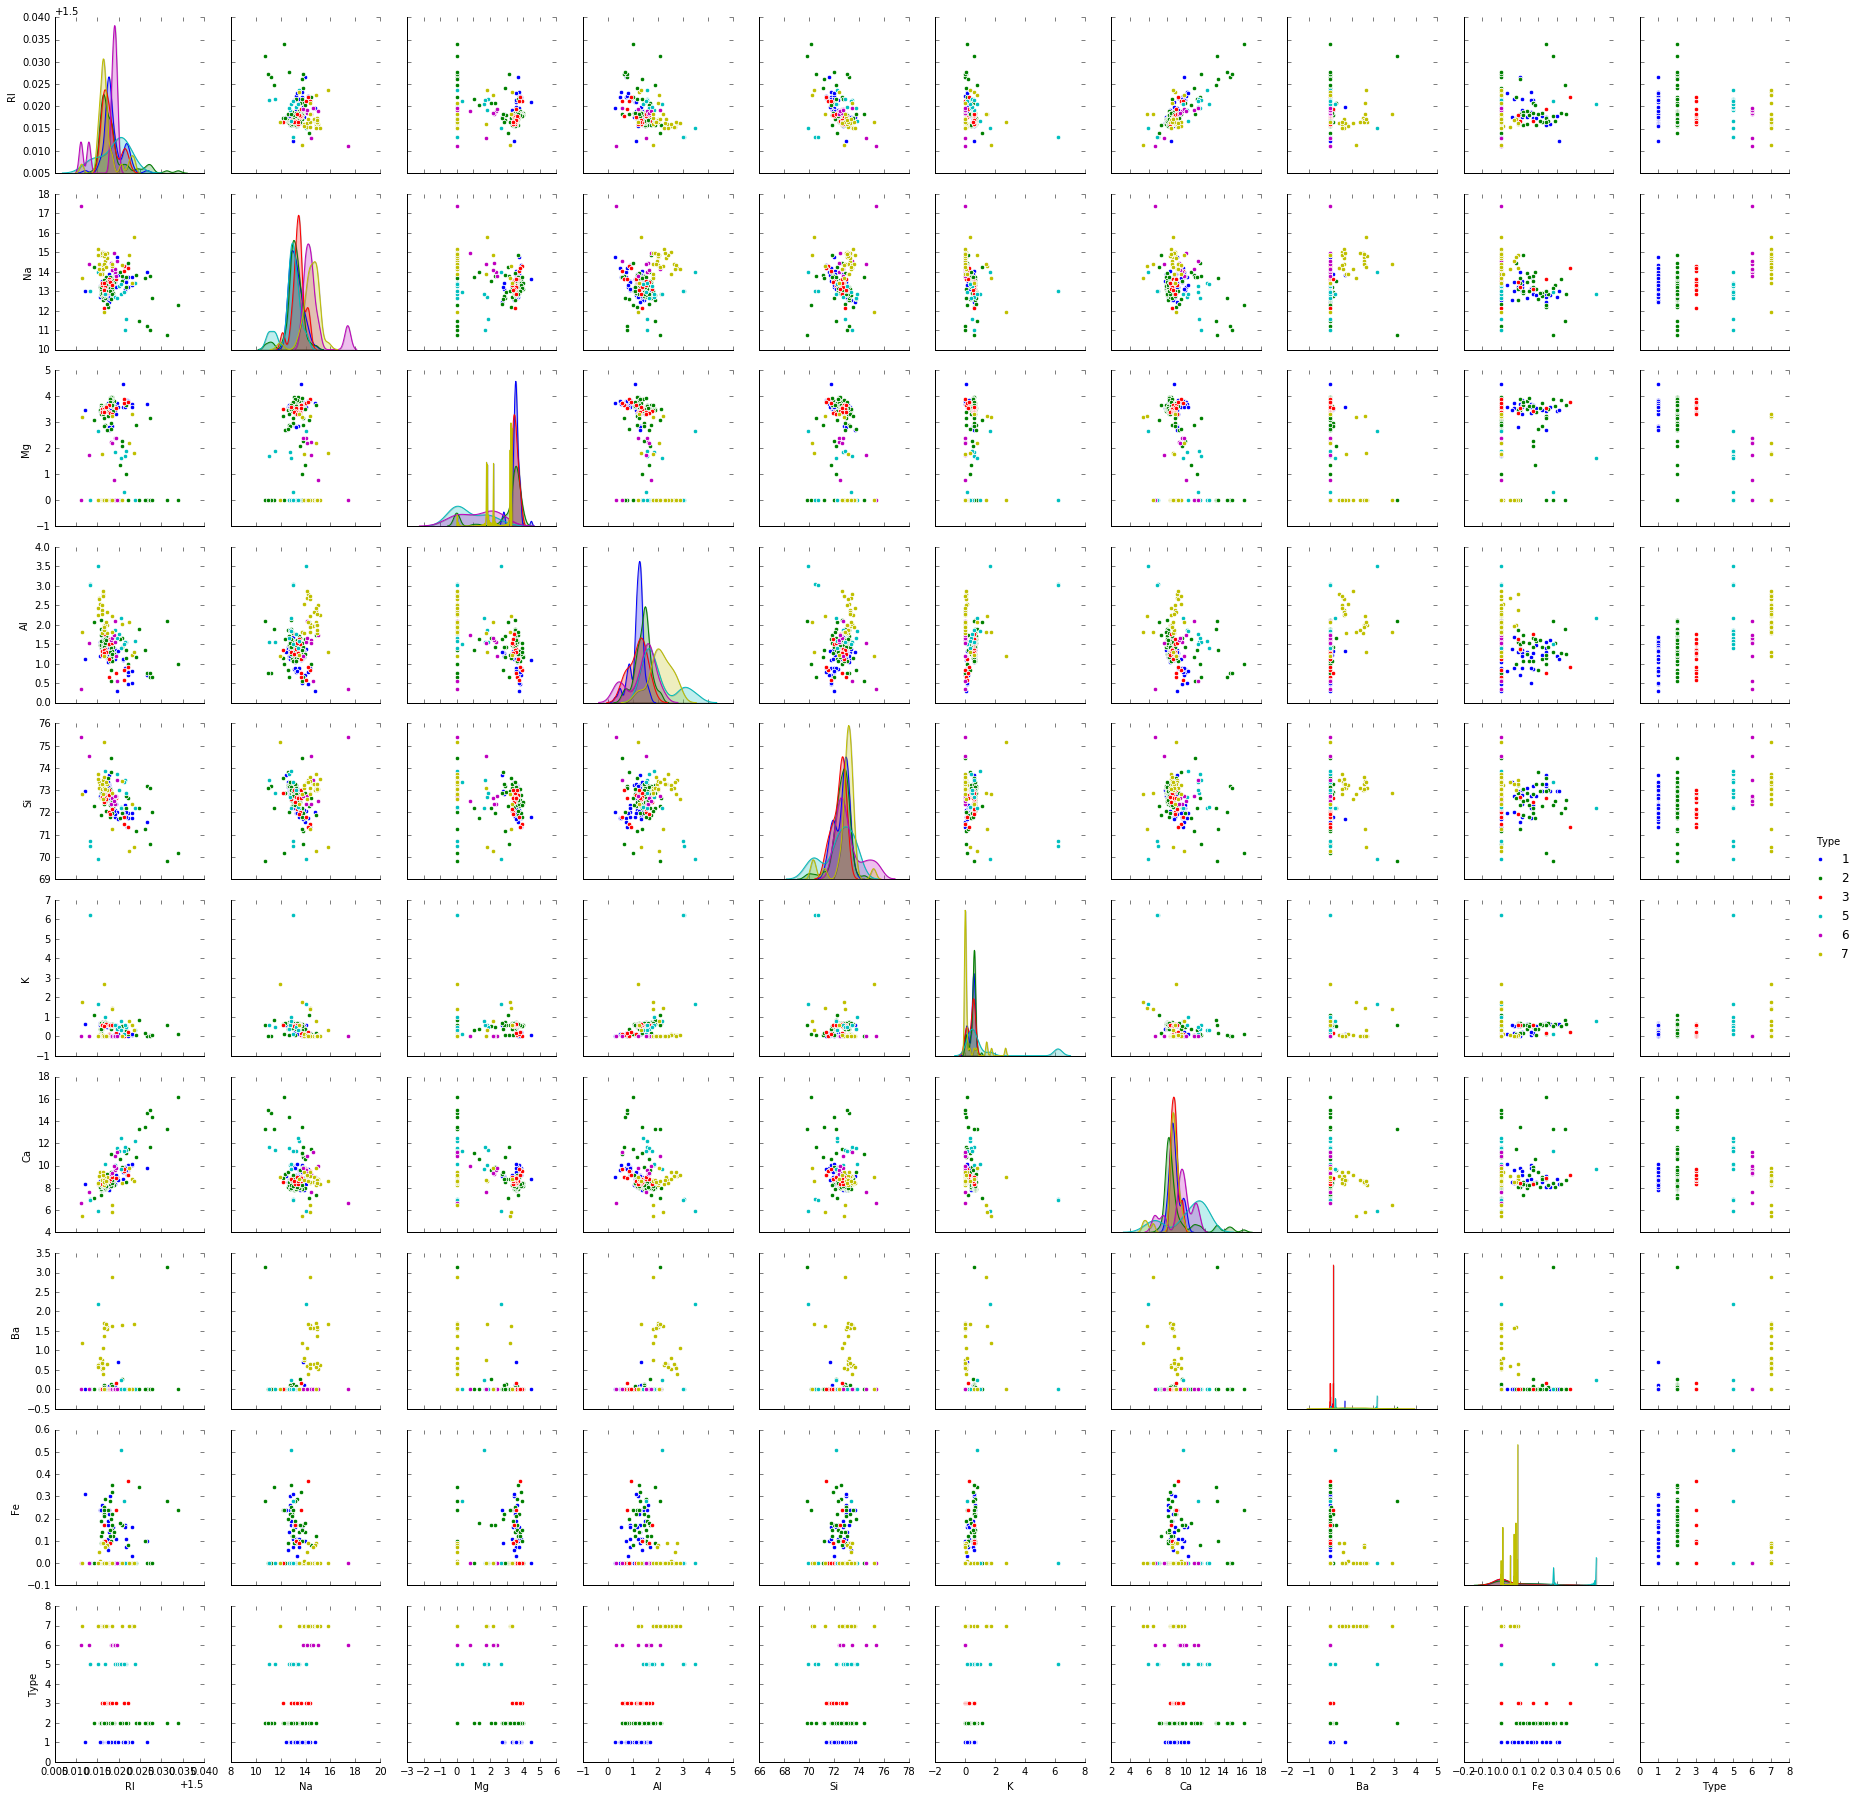

In [9]:
# pairpolot 
#plt.figure(figsize=[10,8])
sns.pairplot(data,hue='Type',diag_kind='kde')
plt.show()

In [10]:
data.Type=data.Type.astype('category')

In [11]:
data.dtypes

RI       float64
Na       float64
Mg       float64
Al       float64
Si       float64
K        float64
Ca       float64
Ba       float64
Fe       float64
Type    category
dtype: object

# Outlier Detection

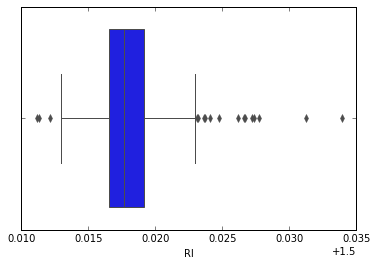

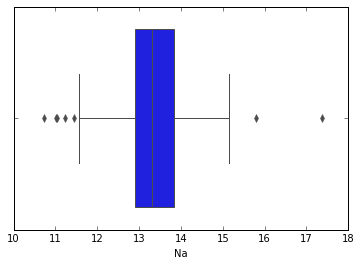

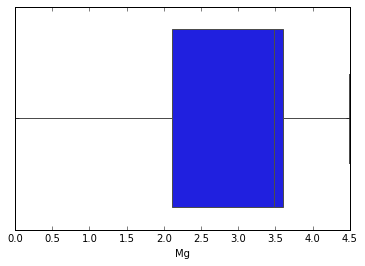

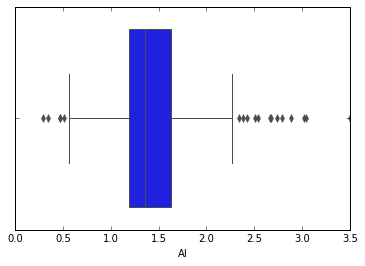

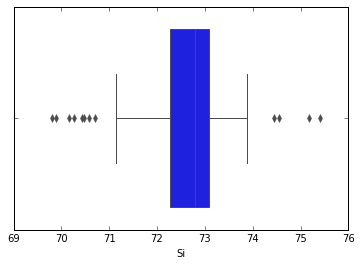

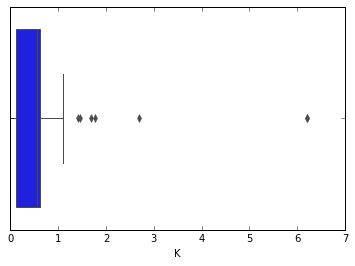

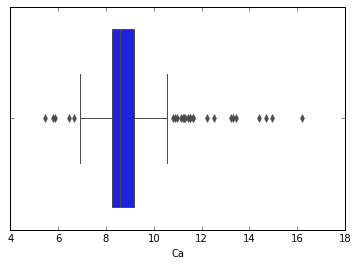

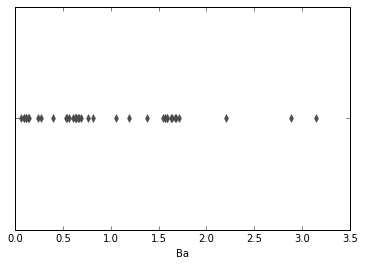

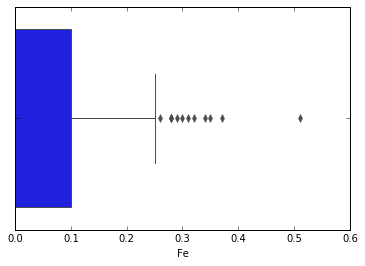

In [12]:
# outlier detection for each column
for col in data.columns:
    if col!='Type':
        plt.figure()
        sns.boxplot(data[col],orient='h')

# Inference

1. Except Mg all the attributes have outliers in it

2. So we do outlier treatment for each attribute

In [13]:
# removing outliers using Zscore
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data.drop('Type',axis=1)))


In [14]:
threshold = 3
print(np.where(z > 3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


## Removing the outliers from data

In [15]:
data_o = data[(z < 3).all(axis=1)]
data_o.shape

(194, 10)

In [16]:
data_o.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Baseline models

In [17]:
#IDV's and DV's
x=data_o.drop('Type',axis=1)
y=data_o[['Type']]

In [78]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,test_size=0.2,random_state=1)

In [22]:
# Logistic Regression
lormod=LogisticRegression()
lormod.fit(xtrain,ytrain)
print("The Baseline model accuracy for Val data is :",round(lormod.score(xval,yval)*100,2))
print("The Baseline model accuracy for test data is :",round(lormod.score(xtest,ytest)*100,2))


The Baseline model accuracy for Val data is : 61.29
The Baseline model accuracy for test data is : 61.54


In [23]:
#Decision Tree
dtmod=DecisionTreeClassifier()
dtmod.fit(xtrain,ytrain)
print("The Baseline model accuracy for Val data is :",round(dtmod.score(xval,yval)*100,2))
print("The Baseline model accuracy for test data is :",round(dtmod.score(xtest,ytest)*100,2))

The Baseline model accuracy for Val data is : 77.42
The Baseline model accuracy for test data is : 64.1


In [24]:
# Random Forest
rfmod=RandomForestClassifier()
rfmod.fit(xtrain,ytrain)
print("The Baseline model accuracy for Val data is :",round(rfmod.score(xval,yval)*100,2))
print("The Baseline model accuracy for test data is :",round(rfmod.score(xtest,ytest)*100,2))

The Baseline model accuracy for Val data is : 77.42
The Baseline model accuracy for test data is : 66.67


In [25]:
# BaggingClassifier
bgcl=BaggingClassifier(oob_score=True)
bgcl.fit(xtrain,ytrain)
print("The Baseline model accuracy for Val data is :",round(bgcl.score(xval,yval)*100,2))
print("The Baseline model accuracy for test data is :",round(bgcl.score(xtest,ytest)*100,2))

The Baseline model accuracy for Val data is : 74.19
The Baseline model accuracy for test data is : 64.1


In [26]:
#GradientBoostingClassifier
gbcl=GradientBoostingClassifier()
gbcl.fit(xtrain,ytrain)
print("The Baseline model accuracy for Val data is :",round(gbcl.score(xval,yval)*100,2))
print("The Baseline model accuracy for test data is :",round(gbcl.score(xtest,ytest)*100,2))

The Baseline model accuracy for Val data is : 74.19
The Baseline model accuracy for test data is : 74.36


## Oversampling using SMOTE

The data is imbalanced i.e the datapoints for type 1,2 are very high as compared to type 5,6 

In [27]:

data_o.Type.value_counts()

1    70
2    68
7    23
3    16
5     9
6     8
Name: Type, dtype: int64

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
print('before UpSampling, the shape of train_X: {}'.format(x.shape))
print('before UpSampling, the shape of train_y: {} \n'.format(y.shape))


sm = SMOTE(k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x1, y1 = sm.fit_sample(x,y)# resampled dataset
x1.shape

print('After UpSampling, the shape of train_X: {}'.format(x1.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y1.shape))



before UpSampling, the shape of train_X: (194, 9)
before UpSampling, the shape of train_y: (194, 1) 

After UpSampling, the shape of train_X: (420, 9)
After UpSampling, the shape of train_y: (420,) 



# Bagging Classifier model without Hyperparameter tuning

In [79]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.2,random_state=1)

In [31]:
xtrain1,xval1,ytrain1,yval1=train_test_split(xtrain1,ytrain1,test_size=0.2,random_state=1)

In [32]:
# Logistic Regression
lormod=LogisticRegression()
lormod.fit(xtrain,ytrain)
print("The Baseline model accuracy for Val data is :",round(lormod.score(xval,yval)*100,2))
print("The Baseline model accuracy for test data is :",round(lormod.score(xtest,ytest)*100,2))


The Baseline model accuracy for Val data is : 61.29
The Baseline model accuracy for test data is : 61.54


In [33]:
#Decision Tree
dtmod=DecisionTreeClassifier()
dtmod.fit(xtrain1,ytrain1)
print("The Baseline model accuracy for Val data is :",round(dtmod.score(xval1,yval1)*100,2))
print("The Baseline model accuracy for test data is :",round(dtmod.score(xtest1,ytest1)*100,2))

The Baseline model accuracy for Val data is : 83.82
The Baseline model accuracy for test data is : 92.86


In [34]:
# Random Forest
rfmod=RandomForestClassifier()
rfmod.fit(xtrain1,ytrain1)
print("The Baseline model accuracy for Val data is :",round(rfmod.score(xval1,yval1)*100,2))
print("The Baseline model accuracy for test data is :",round(rfmod.score(xtest1,ytest1)*100,2))

The Baseline model accuracy for Val data is : 86.76
The Baseline model accuracy for test data is : 92.86


In [35]:
# BaggingClassifier
bgcl=BaggingClassifier(oob_score=True)
bgcl.fit(xtrain1,ytrain1)
print("The Baseline model accuracy for Val data is :",round(bgcl.score(xval1,yval1)*100,2))
print("The Baseline model accuracy for test data is :",round(bgcl.score(xtest1,ytest1)*100,2))

The Baseline model accuracy for Val data is : 88.24
The Baseline model accuracy for test data is : 91.67


In [36]:
#GradientBoostingClassifier
gbcl=GradientBoostingClassifier()
gbcl.fit(xtrain1,ytrain1)
print("The Baseline model accuracy for Val data is :",round(gbcl.score(xval1,yval1)*100,2))
print("The Baseline model accuracy for test data is :",round(gbcl.score(xtest1,ytest1)*100,2))

The Baseline model accuracy for Val data is : 92.65
The Baseline model accuracy for test data is : 96.43


# RandomSearchCV for Best HyperParameter

### for decision tree

In [43]:
dt=DecisionTreeClassifier()

In [38]:
param = {'max_depth': sp_randint(1,50)}

In [41]:
randomCV = RandomizedSearchCV(dt, param_distributions=param, n_iter=200) #default cv = 3
randomCV.fit(x,y)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=200, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000190C7C537F0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [42]:
print(randomCV.best_params_)

{'max_depth': 43}


### for Random forest

In [44]:
rf=RandomForestClassifier()

In [45]:
param = {'max_depth': sp_randint(1,50)}

In [46]:
randomCV = RandomizedSearchCV(rf, param_distributions=param, n_iter=200) #default cv = 3
randomCV.fit(x,y)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=200, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000190C8186C18>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [47]:
print(randomCV.best_params_)

{'max_depth': 32}


### for Bagging classifier

In [52]:
bg=BaggingClassifier()

In [49]:
param = {'n_estimators': sp_randint(1,100),'base_estimator':[dt,rf,lormod]}

In [50]:
randomCV = RandomizedSearchCV(bg, param_distributions=param, n_iter=200) #default cv = 3
randomCV.fit(x,y)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=200, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000190C8194978>, 'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, m...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [51]:
print(randomCV.best_params_)

{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'n_estimators': 27}


### GradientBoosting

In [56]:
Gb=GradientBoostingClassifier()

In [60]:
param = {'max_depth':sp_randint(1,100)}

In [61]:
randomCV = RandomizedSearchCV(Gb, param_distributions=param, n_iter=200) #default cv = 3
randomCV.fit(x,y)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=200, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000190C7AB2C18>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [62]:
print(randomCV.best_params_)

{'max_depth': 3}


### Remodelling using hyper parameters

In [69]:
x1=pd.DataFrame(x1,columns=x.columns)
y1=pd.DataFrame(y1,columns=['Type'])

In [80]:
glass=pd.concat([x1,y1],axis=1)
from sklearn.utils import resample
iters = 100
values = glass.values

DecisionTree = []
RandomForest = []
LogisticReg = []
BaggingClass = []
GradientBoost = []

for i in range(iters):
    train = resample(values, n_samples = 420)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    
    DTC = DecisionTreeClassifier(max_depth = 43)
    DTC.fit(train[:,:-1],train[:,-1])
    DTCscore = DTC.score(test[:,:-1],test[:,-1])
    DecisionTree.append(DTCscore)
    
    RFC = RandomForestClassifier(max_depth = 32)
    RFC.fit(train[:,:-1],train[:,-1])
    RFCscore = RFC.score(test[:,:-1],test[:,-1])
    RandomForest.append(RFCscore)
    
    LOR = LogisticRegression()
    LOR.fit(train[:,:-1],train[:,-1])
    LORscore = LOR.score(test[:,:-1],test[:,-1])
    LogisticReg.append(LORscore)
    
    BGC = BaggingClassifier(n_estimators = 50)
    BGC.fit(train[:,:-1],train[:,-1])
    BGCscore = BGC.score(test[:,:-1],test[:,-1])
    BaggingClass.append(BGCscore)
    
    GBC = GradientBoostingClassifier(max_depth = 3)
    GBC.fit(train[:,:-1],train[:,-1])
    GBCscore = GBC.score(test[:,:-1],test[:,-1])
    GradientBoost.append(GBCscore)

## CI for Logistic Interval

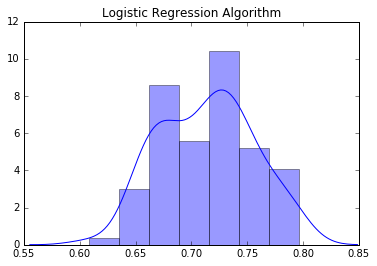

The  95 % confidence interval is:  64.85 % to  79.34 %


In [71]:
sns.distplot(LogisticReg)
plt.title('Logistic Regression Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(LogisticReg,lower),4)*100,
      '% to ',round(np.percentile(LogisticReg,upper),4)*100,'%')

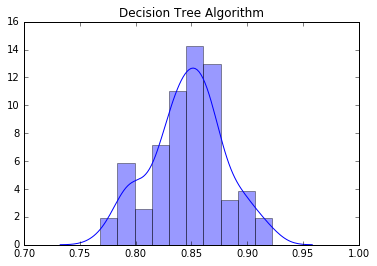

The  95 % confidence interval is:  78.41 % to  91.05 %


In [74]:
sns.distplot(DecisionTree)
plt.title('Decision Tree Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(DecisionTree,lower),4)*100,
      '% to ',round(np.percentile(DecisionTree,upper),4)*100,'%')

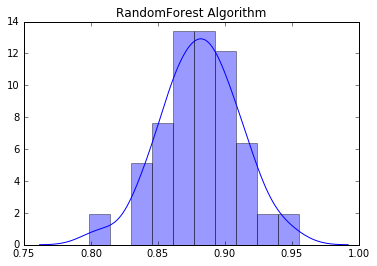

The  95 % confidence interval is:  82.23 % to  93.92 %


In [75]:
sns.distplot(RandomForest)
plt.title('RandomForest Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(RandomForest,lower),4)*100,
      '% to ',round(np.percentile(RandomForest,upper),4)*100,'%')

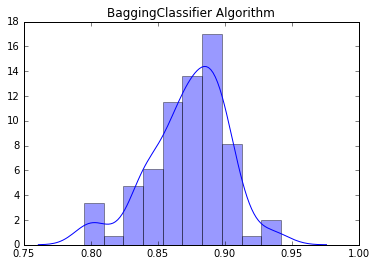

The  95 % confidence interval is:  80.05 % to  92.29 %


In [76]:
sns.distplot(BaggingClass)
plt.title('BaggingClassifier Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(BaggingClass,lower),4)*100,
      '% to ',round(np.percentile(BaggingClass,upper),4)*100,'%')

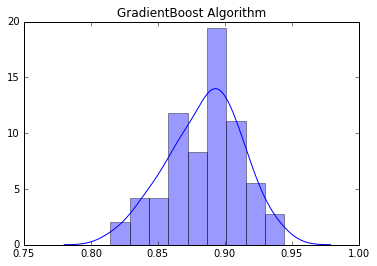

The  95 % confidence interval is:  82.8 % to  93.52000000000001 %


In [77]:
sns.distplot(GradientBoost)
plt.title('GradientBoost Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(GradientBoost,lower),4)*100,
      '% to ',round(np.percentile(GradientBoost,upper),4)*100,'%')